### israel palestine war conflict. Gaining insights of people of India.

### importing libraries

In [1]:

import numpy as np   
import pandas as pd  
  
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

#################### Machine Learning #####################3
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 

import warnings  
warnings.filterwarnings("ignore")



### code to getting comments from youtube

In [2]:
# Import the required libraries
import pandas as pd
from pytube import YouTube
from googleapiclient.discovery import build

# Define a function to get comments from a YouTube video and store them in a DataFrame
def get_all_comments_to_dataframe(video_url, api_key, max_comments=100):
    # Initialize the YouTube API client using the provided API key
    youtube = build('youtube', 'v3', developerKey=api_key)

    # Extract the video ID from the URL using the pytub library
    video_id = YouTube(video_url).video_id

    # Define a nested function to retrieve comments with pagination
    def get_comments_with_pagination(video_id, max_results=100):
        # Initialize an empty list to store the comments
        comments = []
        # Initialize a variable to track the next page of comments
        nextPageToken = None

        # Continue fetching comments until the desired number is reached
        while len(comments) < max_comments:
            # Call the YouTube API to retrieve comments for the video
            results = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                textFormat="plainText",
                order="relevance",
                maxResults=min(100, max_comments - len(comments)),
                pageToken=nextPageToken
            ).execute()

            # Extract and append comments from the API response
            for item in results["items"]:
                comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
                #item["snippet"] accesses the "snippet" section of the comment item, which contains metadata related to the comment.
                comments.append(comment)

            # Check if there are more pages of comments
            if 'nextPageToken' in results:
                #Checks whether the API response (results) contains a "nextPageToken" field.
                #This field is provided by the YouTube Data API when there are additional pages of comments available.
                nextPageToken = results['nextPageToken']
            else:
                # Exit the loop if there are no more comments
                break

        return comments

    # Get all comments for the video using the nested function
    all_comments = get_comments_with_pagination(video_id, max_comments)

    # Create a Pandas DataFrame from the comments, where each comment is a row
    comments_df = pd.DataFrame({'Comment': all_comments})

    # Return the DataFrame containing the comments
    return comments_df



In [3]:
# Replace it with your actual YouTube Data API key
API_KEY = ''

# Set the YouTube video URL from which you want to retrieve comments
VIDEO_URL = ''

# Set the maximum number of comments you want to retrieve
MAX_COMMENTS = 750

# Call the function to get comments and create a DataFrame
df = get_all_comments_to_dataframe(VIDEO_URL, API_KEY, MAX_COMMENTS)

# Print the DataFrame containing the comments
print(df)


                                               Comment
0    I’m glad this government or her foreign policy...
1    I also stand firmly with India’s Foreign Polic...
2    Would never have thought to see the day where ...
3    My heart goes out for innocent civilians on bo...
4               India stands with peace and diplomacy.
..                                                 ...
745  I think this statement by the Muslim world's p...
746  Один и тот же режиссер ,сидящий на попе в Нью-...
747             Modi should being kick out from indian
748                                      Al munafiquun
749                                  free Ratko Mladic

[750 rows x 1 columns]


In [4]:
df

,Comment
0,I’m glad this government or her foreign policy...
1,I also stand firmly with India’s Foreign Polic...
2,Would never have thought to see the day where ...
3,My heart goes out for innocent civilians on bo...
4,India stands with peace and diplomacy.
...,...
745,I think this statement by the Muslim world's p...
746,"Один и тот же режиссер ,сидящий на попе в Нью-..."
747,Modi should being kick out from indian
748,Al munafiquun


In [5]:
df.reset_index(inplace=True)

In [6]:
df

,index,Comment
0,0,I’m glad this government or her foreign policy...
1,1,I also stand firmly with India’s Foreign Polic...
2,2,Would never have thought to see the day where ...
3,3,My heart goes out for innocent civilians on bo...
4,4,India stands with peace and diplomacy.
...,...,...
745,745,I think this statement by the Muslim world's p...
746,746,"Один и тот же режиссер ,сидящий на попе в Нью-..."
747,747,Modi should being kick out from indian
748,748,Al munafiquun


In [7]:
df.iloc[:1,1][0][0]

'I'

In [8]:
df['Comment'][1][0]

'I'

In [9]:
import string

In [10]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [11]:
for i in df['index']:
    if df.loc[i,'Comment'][0][0] in string.ascii_letters:
        pass
    else:
        df.drop(i,inplace=True)


In [12]:
df

,index,Comment
0,0,I’m glad this government or her foreign policy...
1,1,I also stand firmly with India’s Foreign Polic...
2,2,Would never have thought to see the day where ...
3,3,My heart goes out for innocent civilians on bo...
4,4,India stands with peace and diplomacy.
...,...,...
744,744,Two faced.
745,745,I think this statement by the Muslim world's p...
747,747,Modi should being kick out from indian
748,748,Al munafiquun


In [13]:
df.drop('index',axis=1,inplace=True)

In [14]:
df

,Comment
0,I’m glad this government or her foreign policy...
1,I also stand firmly with India’s Foreign Polic...
2,Would never have thought to see the day where ...
3,My heart goes out for innocent civilians on bo...
4,India stands with peace and diplomacy.
...,...
744,Two faced.
745,I think this statement by the Muslim world's p...
747,Modi should being kick out from indian
748,Al munafiquun


In [15]:
df.loc[2,['Comment']]

Comment    Would never have thought to see the day where ...
Name: 2, dtype: object

In [16]:
df['Comment']

0      I’m glad this government or her foreign policy...
1      I also stand firmly with India’s Foreign Polic...
2      Would never have thought to see the day where ...
3      My heart goes out for innocent civilians on bo...
4                 India stands with peace and diplomacy.
                             ...                        
744                                           Two faced.
745    I think this statement by the Muslim world's p...
747               Modi should being kick out from indian
748                                        Al munafiquun
749                                    free Ratko Mladic
Name: Comment, Length: 695, dtype: object

### Data Preprocessing

In [17]:
df.Comment = df.Comment.str.lower()

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### remove punctuations

In [19]:
def remove_punctuation(abc):
    text_nopunt="".join([c  
                         for c in abc  
                         if c not in string.punctuation])
    return text_nopunt

In [20]:
df.Comment = df.Comment.apply(lambda x : remove_punctuation(x))  # x = Text 

In [21]:
df

,Comment
0,i’m glad this government or her foreign policy...
1,i also stand firmly with india’s foreign polic...
2,would never have thought to see the day where ...
3,my heart goes out for innocent civilians on bo...
4,india stands with peace and diplomacy
...,...
744,two faced
745,i think this statement by the muslim worlds pr...
747,modi should being kick out from indian
748,al munafiquun


In [22]:
df.loc[1,'Comment']

'i also stand firmly with india’s foreign policy palestine as a state has always existed and it would be inhumane of us to not support their existence as a state and their legitimate rights hope the peace prevails and humanity is saved from this catastrophe'

In [23]:
df['Comment'] = df['Comment'].str.replace('\d+','')  # data.text  or data['text']

#### remove stopwords

In [24]:
# Import stopwords with nltk.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sourabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([abc   # x = Text 
                                                      for abc in x.split() # word tokenizer # abc = Delhi
                                                      if abc not in (stop)]))

In [26]:
import re # replace of words
nltk.download('words') # downloading dictionary of nltk  
words = set(nltk.corpus.words.words()) # corpus & set array 
words

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sourabh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


{'caesaropopism',
 'viruliferous',
 'Atlantean',
 'pentacrinite',
 'schtoff',
 'undemonstratively',
 'windlin',
 'lithuresis',
 'Aaru',
 'degger',
 'chauk',
 'polyorama',
 'shallal',
 'situational',
 'impedite',
 'Evelina',
 'splenemia',
 'parabanic',
 'pickerelweed',
 'Apharsathacites',
 'fraudulently',
 'Boulangist',
 'isocinchomeronic',
 'Myxosporidia',
 'preconceptional',
 'programist',
 'matriarchist',
 'Numenius',
 'clerkship',
 'philosophobia',
 'indoles',
 'greenwort',
 'spiritdom',
 'egest',
 'engarble',
 'preaver',
 'upwaft',
 'nervous',
 'ornamentality',
 'wistonwish',
 'cheepy',
 'undisadvantageous',
 'artel',
 'Monadina',
 'pluriaxial',
 'zippy',
 'puzzleheadedness',
 'Liverpudlian',
 'undermeaning',
 'desmachymatous',
 'Palmaceae',
 'stalactitious',
 'enophthalmus',
 'gastropyloric',
 'karyological',
 'inerasableness',
 'uniphaser',
 'ureteropyelitis',
 'Helena',
 'cattleless',
 'irrecoverably',
 'sacrosanctness',
 'wheeler',
 'appropinquate',
 'jangkar',
 'dermoskeleton'

In [27]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text =  re.sub('israel', '', text)
    text =  re.sub('palestine','', text) 
    text =  re.sub(r"\b[a-zA-Z]\b", "", text) ## 1 alphabet like a or s
    text =  re.sub(r"\b[a-zA-Z][a-zA-Z]\b", "", text)  ## 2 alphabet like ab or ad & aA
    text =  " ".join(w 
                     for w in nltk.wordpunct_tokenize(text)  ## this will give you tokens 
                      if w.lower() in words)  #    
    return text

In [28]:
df = pd.DataFrame(df.Comment.apply(lambda x: clean_text_round2(x)))


#### lemmatization

In [29]:
from nltk.stem import WordNetLemmatizer 
import nltk
#nltk.download('wordnet') # DOWNLAOD WORDNET

lemmatizer = WordNetLemmatizer() # ASSIGNING
word_tokenizer = nltk.tokenize.WhitespaceTokenizer() ## Word Token

In [30]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,"v") 
            for w in word_tokenizer.tokenize(text)]

In [31]:
df.Comment = df.Comment.apply(lambda x :' '.join(lemmatize_text(x)))


In [32]:
df['Comment'] = (df['Comment'].astype("str").str.rstrip())

In [33]:
df

,Comment
0,glad government foreign policy clarity stand p...
1,also stand firmly foreign policy state always ...
2,would never think see day exactly truly inspire
3,heart go innocent side border worst humanitari...
4,peace diplomacy
...,...
744,two face
745,think statement pressure
747,kick
748,


#### removing duplicates

In [34]:
df=df.drop_duplicates('Comment')
df

,Comment
0,glad government foreign policy clarity stand p...
1,also stand firmly foreign policy state always ...
2,would never think see day exactly truly inspire
3,heart go innocent side border worst humanitari...
4,peace diplomacy
...,...
741,also make peaceful resolution give half land f...
742,abbas natural nit active minister abbas bogy c...
744,two face
745,think statement pressure


In [35]:
# Reset the index in-place
df.reset_index(inplace=True)


In [36]:
df

,index,Comment
0,0,glad government foreign policy clarity stand p...
1,1,also stand firmly foreign policy state always ...
2,2,would never think see day exactly truly inspire
3,3,heart go innocent side border worst humanitari...
4,4,peace diplomacy
...,...,...
610,741,also make peaceful resolution give half land f...
611,742,abbas natural nit active minister abbas bogy c...
612,744,two face
613,745,think statement pressure


In [37]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english') 
data_cv = cv.fit_transform(df.Comment)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out()) # TERM = KEY WORDS

# One of the required inputs is a term-document matrix
tdm = data_dtm.transpose()
tdm.head()

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,612,613,614
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abbas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
abide,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
able,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
absolutely,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
tdm.reset_index(inplace=True)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,605,606,607,608,609,610,611,612,613,614
0,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
tdm['freq'] = tdm.sum(axis=1)
tdm.head()

,index,0,1,2,3,4,5,6,7,8,...,606,607,608,609,610,611,612,613,614,freq
0,abandon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,abbas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,2
2,abide,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,able,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,absolutely,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [40]:
tdm1 = tdm[["index","freq"]] #SUBSET OF 2 COLUMNS
tdm1.rename(columns = {'index':'Word'}, inplace = True) # RENAMING 
tdm1.sort_values(by='freq',ascending=False,inplace=True) # SORTING DATA 
tdm1.head(20)

,Word,freq
1168,support,161
1130,stand,93
1135,state,67
860,people,55
856,peace,53
688,like,47
1329,world,46
1028,say,46
259,country,42
516,good,41


In [41]:
text = " ".join(review for review in df.Comment)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 34814 words in the combination of all review.


### generating wordcloud

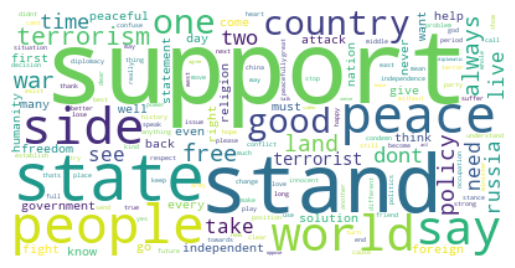

In [42]:
## collocations=False means try to contro the duplicate keyword and counts as 1
# lower max_font_size, change the maximum number of word and lighten the background:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
# Generate a word cloud image
cloud = WordCloud(stopwords=stopwords, # BACK UP
                      background_color="white",
                      collocations=False,
                      max_words=150).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(cloud, interpolation='bilinear') # IM = IMAGE 
plt.axis("off") # NO AXIS
plt.show() # DISPLAY PLOT

In [43]:
data=df

In [44]:
data

,index,Comment
0,0,glad government foreign policy clarity stand p...
1,1,also stand firmly foreign policy state always ...
2,2,would never think see day exactly truly inspire
3,3,heart go innocent side border worst humanitari...
4,4,peace diplomacy
...,...,...
610,741,also make peaceful resolution give half land f...
611,742,abbas natural nit active minister abbas bogy c...
612,744,two face
613,745,think statement pressure


In [45]:
data.drop_duplicates('Comment',inplace=True) 



In [46]:
data

,index,Comment
0,0,glad government foreign policy clarity stand p...
1,1,also stand firmly foreign policy state always ...
2,2,would never think see day exactly truly inspire
3,3,heart go innocent side border worst humanitari...
4,4,peace diplomacy
...,...,...
610,741,also make peaceful resolution give half land f...
611,742,abbas natural nit active minister abbas bogy c...
612,744,two face
613,745,think statement pressure


In [51]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.Comment)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())

# One of the required inputs is a term-document matrix
data_dtm

,abandon,abbas,abide,able,absolutely,accept,accord,achieve,acknowledge,acquire,...,worst,worth,wow,write,wrong,yes,yesterday,young,youve,zee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
611,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data_dtm.shape

(615, 1342)

In [53]:
data_dtm.dropna(inplace=True)

In [54]:
data_dtm.shape

(615, 1342)

In [55]:
data_dtm

,abandon,abbas,abide,able,absolutely,accept,accord,achieve,acknowledge,acquire,...,worst,worth,wow,write,wrong,yes,yesterday,young,youve,zee
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
611,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
613,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# import nltk
from nltk.sentiment import SentimentIntensityAnalyzer


In [57]:
sid = SentimentIntensityAnalyzer()

In [58]:
#nltk.download('vader_lexicon')

In [59]:
data

,index,Comment
0,0,glad government foreign policy clarity stand p...
1,1,also stand firmly foreign policy state always ...
2,2,would never think see day exactly truly inspire
3,3,heart go innocent side border worst humanitari...
4,4,peace diplomacy
...,...,...
610,741,also make peaceful resolution give half land f...
611,742,abbas natural nit active minister abbas bogy c...
612,744,two face
613,745,think statement pressure


### finding sentiment score for whole phrase

In [61]:
def Sentence_sentiment_SCORE(x):
    sentiment_scores = sid.polarity_scores(x)
    compound_score=sentiment_scores['compound']
    return compound_score

In [62]:
data['Sscore']=data['Comment'].apply(Sentence_sentiment_SCORE)

In [63]:
data

,index,Comment,Sscore
0,0,glad government foreign policy clarity stand p...,-0.7906
1,1,also stand firmly foreign policy state always ...,0.7845
2,2,would never think see day exactly truly inspire,0.7650
3,3,heart go innocent side border worst humanitari...,-0.7783
4,4,peace diplomacy,0.5423
...,...,...,...
610,741,also make peaceful resolution give half land f...,0.9413
611,742,abbas natural nit active minister abbas bogy c...,0.6369
612,744,two face,0.0000
613,745,think statement pressure,-0.2960


#### classifying in two categories as positive and negative

In [64]:
category=lambda x:'positive' if x>=0 else 'negative'

In [65]:
data['sentiment']=data['Sscore'].apply(category)

In [66]:
data

,index,Comment,Sscore,sentiment
0,0,glad government foreign policy clarity stand p...,-0.7906,negative
1,1,also stand firmly foreign policy state always ...,0.7845,positive
2,2,would never think see day exactly truly inspire,0.7650,positive
3,3,heart go innocent side border worst humanitari...,-0.7783,negative
4,4,peace diplomacy,0.5423,positive
...,...,...,...,...
610,741,also make peaceful resolution give half land f...,0.9413,positive
611,742,abbas natural nit active minister abbas bogy c...,0.6369,positive
612,744,two face,0.0000,positive
613,745,think statement pressure,-0.2960,negative


In [67]:
data.sentiment.value_counts()

positive    462
negative    153
Name: sentiment, dtype: int64

In [68]:
data_dtm['Sentiment'] = data.sentiment
data_dtm.head()

,abandon,abbas,abide,able,absolutely,accept,accord,achieve,acknowledge,acquire,...,worth,wow,write,wrong,yes,yesterday,young,youve,zee,Sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,positive


### applying machine learning

In [69]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split

train_x = data_dtm.drop(['Sentiment'],axis=1)
train_y = data_dtm['Sentiment']


X_train, X_test, y_train, y_test =train_test_split(train_x,train_y,test_size=0.3,random_state=231)

In [71]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [73]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="log_loss",criterion="squared_error")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [74]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 2, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 2}


In [87]:
gscv_GBM.best_params_= {'learning_rate': 0.75, 'max_depth': 6, 'min_samples_leaf': 100, 'min_samples_split': 150, 'n_estimators': 4}

In [88]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.75, max_depth=6,
                           min_samples_leaf=100, min_samples_split=150,
                           n_estimators=4)

In [89]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

In [90]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       107
    positive       0.75      1.00      0.86       323

    accuracy                           0.75       430
   macro avg       0.38      0.50      0.43       430
weighted avg       0.56      0.75      0.64       430



In [91]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        46
    positive       0.75      1.00      0.86       139

    accuracy                           0.75       185
   macro avg       0.38      0.50      0.43       185
weighted avg       0.56      0.75      0.64       185



In [ ]:
#####################################################################################